# Chapter-1: An Introduction to netCDF

***

## What is netCDF?

netCDF stands for Network Common Data Form. It is a machine-independent data format widely used for creating, accessing, and sharing array-oriented scientific data. In earth system science (ESS), datasets are predominantly published in this format for several reasons:

* **Self-describing**: A netCDF file includes data as well as the information about the data (metadata).

* **Portable and sharable**: A netCDF file can be accessed by various types of computers and can be accessed by one writer and multiple readers simultaneously.

* **Scalable and appendable**: A small subset can easily be extracted from a large dataset. Additional data can also be appended to an existing file, as long as the structure of both datasets is aligned.

* **Suitable for data archiving**: Older versions of netCDF data are as well supported as current and future versions by most softwares.

Despite its widespread use, interpreting a netCDF file can be challenging, especially for newcomers to the format. This chapter will help you to easily understand the content structure of a standard netCDF file.


## netCDF content structure

A netCDF file generally contains **data** and attributes about the data, known as **metadata**. The data is composed of *dimensions* and *variables*, which can be divided into data variables, coordinate variables, and eventually auxiliary coordinate variables.

* **Dimensions** define the dimensional span and the number of elements each dimension has.

* **Coordinate Variables** specify the coordinates along each dimension. 
    * Should be one-dimensional
    * Should contain strictly increasing or decreasing values
    * Must not contain any missing values
    * Should have the same name as the dimension that it represents

* **Auxiliary Coordinate Variables** are variables that contain coordinates but don't fulfill the conditions of coordinate variables.
    * Can be multi-dimensional
    * Do not need to have strictly increasing or decreasing values
    * Can include missing values
    * Do not need to match their dimension names
    
* **Data variables** contain the actual data arrays. In the ESS domain, they usually represent physical variables such as air temperature, wind speed, etc. These variables typically span multiple dimensions, usually over longitude, latitude, time, and vertical dimensions like altitude, depth, and pressure levels.

* **Attributes (metadata)**
    * Each variable has information about itself, such as units and definition of this variable **(variable attribute)**
    * At the end of the header, we can specify **global attributes** containing descriptive information about the entire dataset such as a title, contact persons, website, references, etc.

## Example

To elaborate on the structure of a standard netCDF file, we will examine a [dataset](https://www.unidata.ucar.edu/software/netcdf/examples/files.html) of sea surface temperatures collected by the Program for Climate Model Diagnosis & Intercomparison [PCMDI](https://pcmdi.llnl.gov/about.html).

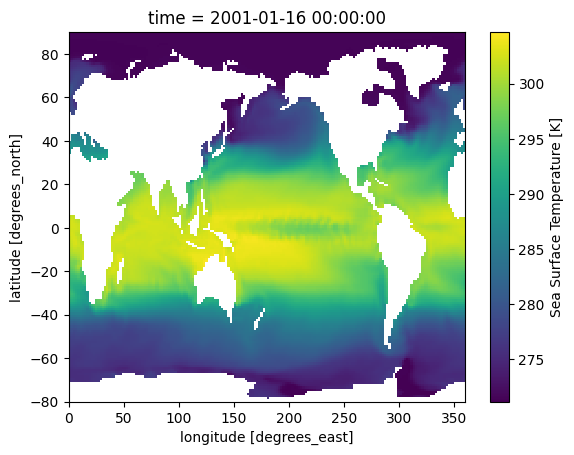

In [2]:
import xarray as xr
# ds = xr.open_dataset("../DATA/tos_O1_2001-2002.nc")
ds = xr.open_dataset(
    "/Users/icdc/Documents/NFDI/Kemeng/cfbook/src/data/tos_O1_2001-2002.nc")
ds.tos[0, :, :].plot()

In [3]:
ds = xr.open_dataset(
    "/Users/icdc/Documents/NFDI/Kemeng/cfbook/src/data/tos_O1_2001-2002.nc",
    decode_cf=False)
ds.info()

xarray.Dataset {
dimensions:
	lon = 180 ;
	bnds = 2 ;
	lat = 170 ;
	time = 24 ;

variables:
	float64 lon(lon) ;
		lon:standard_name = longitude ;
		lon:long_name = longitude ;
		lon:units = degrees_east ;
		lon:axis = X ;
		lon:bounds = lon_bnds ;
		lon:original_units = degrees_east ;
	float64 lon_bnds(lon, bnds) ;
	float64 lat(lat) ;
		lat:standard_name = latitude ;
		lat:long_name = latitude ;
		lat:units = degrees_north ;
		lat:axis = Y ;
		lat:bounds = lat_bnds ;
		lat:original_units = degrees_north ;
	float64 lat_bnds(lat, bnds) ;
	float64 time(time) ;
		time:standard_name = time ;
		time:long_name = time ;
		time:units = days since 2001-1-1 ;
		time:axis = T ;
		time:calendar = 360_day ;
		time:bounds = time_bnds ;
		time:original_units = seconds since 2001-1-1 ;
	float64 time_bnds(time, bnds) ;
	float32 tos(time, lat, lon) ;
		tos:standard_name = sea_surface_temperature ;
		tos:long_name = Sea Surface Temperature ;
		tos:units = K ;
		tos:cell_methods = time: mean (interval: 30 

```{note}
Please note that the variable attribute `tos:cell_methods = time: mean (interval: 30 minutes)` is considered a mistake in the source dataset, where the interval should be `30 days` instead of `30 minutes` in this context.
```

### Dimensions
- In our example we have 4 dimensions `lat`, `lon`, `time`, `bnds`

### Coordinate Variables
- In our example `lat(lat)`, `lon(lon)`, and `time(time)`.

- For example, defined by dimension `time = 24`, `time(time)` is a one-dimensional array containing 24 time coordinates. 

- Similarly, `lat(lat)` and `lon(lon)` are one-dimensional arrays containing 170 and 180 coordinate elements respectively.

```{note}
When reading netCDF files with softwares, variables are usually displayed as `variable_name(dimension)`. For instance, in `time(time)`, the `time` outside the parentheses is the variable name, while the `time` inside refers to the dimension "time".
```

In [4]:
print("The time coordinates are: ", ds.time.data)

The time coordinates are:  [ 15.  45.  75. 105. 135. 165. 195. 225. 255. 285. 315. 345. 375. 405.
 435. 465. 495. 525. 555. 585. 615. 645. 675. 705.]


### Auxiliary Coordinate Variables

- In our example `lat_bnds`, `lon_bnds`, `time_bnds`.

- `time_bnds(time, bnds)` is an auxiliary coordinate variable and, at the same time, a so-called *boundary variable*. It is a two-dimensional array and contains coordinates in pairs that describe the bounds of a time interval. It is a common pratice for many data producers to select the midpoint of a time interval as time coordinate and pack the start and the end of the interval into a boundary variable. In our example, the "15th day" of each "30-day interval" is selected as time coordinate while the first and the last day of the interval make up the boundary coordinates. 

- Similarly, `lon_bnds(lon, bnds)` and `lat_bnds(lat, bnds)` are auxiliary coordinate variables and, at the same time, boundary variables for the dimension `lon` and `lat`.

In [6]:
print("The time boundary coordinates are: ") 
ds.time_bnds.data

The time boundary coordinates are: 


array([[  0.,  30.],
       [ 30.,  60.],
       [ 60.,  90.],
       [ 90., 120.],
       [120., 150.],
       [150., 180.],
       [180., 210.],
       [210., 240.],
       [240., 270.],
       [270., 300.],
       [300., 330.],
       [330., 360.],
       [360., 390.],
       [390., 420.],
       [420., 450.],
       [450., 480.],
       [480., 510.],
       [510., 540.],
       [540., 570.],
       [570., 600.],
       [600., 630.],
       [630., 660.],
       [660., 690.],
       [690., 720.]])

### Data Variables

- In our example `tos(time, lat, lon)`
- The data variable contains sea surface temperature data in a space defined by time, latitude, and longitude.
- Here you can see an excerpt of the values for `tos`

 ```yaml
 tos =
  _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, 
    _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, 
    _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, 
    _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, 
    _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, 
    _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, 
    _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, 
    _, _, _, _, _, _, _, _, _, _, _,
  _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, 
    _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, 
    _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, 
    _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, 275.8637, _, _, _, _, 
    _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, 
    _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, 
    _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, 
    _, _, _, _, _, _, _, _, _, _, _, _, _,
  _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, 
    _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, 
    _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, 
    _, _, _, _, _, _, _, _, _, 275.6657, 275.8596, 276.042, 276.1425, 
    276.1662, 276.1198, 276.0396, 275.9248, 275.787, 275.686, 275.5566, 
    275.3785, 275.1796, 274.9005, 274.5688, 274.108, 273.39, 272.6334, 
    272.0998, 271.3627, _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, 
    _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, _, 
    _, _, _, _, _, 272.4681, 271.1732, 271.1732, 271.1732, 271.1736, 
    271.1736, 271.5586, 272.0218, 272.4012, 272.5677, 272.4937, 272.2816, 
    271.9929, 271.6465, 271.3219, _, _, _, _, _, _, _, _, _, _, _, _, _, _, 
...
```

### Variable attributes
As an example, let's have a look at the variable `lon(lon)`, which has the data type float64. The main attributes (the names after the colon) are
- **units**, in this case **"degrees_east"**
- **standard_name**: a standardized name to define / describe this variable, in this case **"longitude"**

In [19]:
ds.lon

<xarray.DataArray 'lon' (lon: 180)> Size: 1kB
array([  1.,   3.,   5.,   7.,   9.,  11.,  13.,  15.,  17.,  19.,  21.,  23.,
        25.,  27.,  29.,  31.,  33.,  35.,  37.,  39.,  41.,  43.,  45.,  47.,
        49.,  51.,  53.,  55.,  57.,  59.,  61.,  63.,  65.,  67.,  69.,  71.,
        73.,  75.,  77.,  79.,  81.,  83.,  85.,  87.,  89.,  91.,  93.,  95.,
        97.,  99., 101., 103., 105., 107., 109., 111., 113., 115., 117., 119.,
       121., 123., 125., 127., 129., 131., 133., 135., 137., 139., 141., 143.,
       145., 147., 149., 151., 153., 155., 157., 159., 161., 163., 165., 167.,
       169., 171., 173., 175., 177., 179., 181., 183., 185., 187., 189., 191.,
       193., 195., 197., 199., 201., 203., 205., 207., 209., 211., 213., 215.,
       217., 219., 221., 223., 225., 227., 229., 231., 233., 235., 237., 239.,
       241., 243., 245., 247., 249., 251., 253., 255., 257., 259., 261., 263.,
       265., 267., 269., 271., 273., 275., 277., 279., 281., 283., 285., 287.,
       289., 291., 293., 295., 297., 299., 301., 303., 305., 307., 309., 311.,
       313., 315., 317., 319., 321., 323., 325., 327., 329., 331., 333., 335.,
       337., 339., 341., 343., 345., 347., 349., 351., 353., 355., 357., 359.])
Coordinates:
  * lon      (lon) float64 1kB 1.0 3.0 5.0 7.0 9.0 ... 353.0 355.0 357.0 359.0
Attributes:
    standard_name:   longitude
    long_name:       longitude
    units:           degrees_east
    axis:            X
    bounds:          lon_bnds
    original_units:  degrees_east

### Global Attributes

In [13]:
ds.attrs

{'title': 'IPSL  model output prepared for IPCC Fourth Assessment SRES A2 experiment',
 'institution': 'IPSL (Institut Pierre Simon Laplace, Paris, France)',
 'source': 'IPSL-CM4_v1 (2003) : atmosphere : LMDZ (IPSL-CM4_IPCC, 96x71x19) ; ocean ORCA2 (ipsl_cm4_v1_8, 2x2L31); sea ice LIM (ipsl_cm4_v',
 'contact': 'Sebastien Denvil, sebastien.denvil@ipsl.jussieu.fr',
 'project_id': 'IPCC Fourth Assessment',
 'table_id': 'Table O1 (13 November 2004)',
 'experiment_id': 'SRES A2 experiment',
 'realization': 1,
 'cmor_version': 0.96,
 'Conventions': 'CF-1.0',
 'history': 'YYYY/MM/JJ: data generated; YYYY/MM/JJ+1 data transformed  At 16:37:23 on 01/11/2005, CMOR rewrote data to comply with CF standards and IPCC Fourth Assessment requirements',
 'references': 'Dufresne et al, Journal of Climate, 2015, vol XX, p 136',
 'comment': 'Test drive'}

We will delve deeper into "attributes" in the next chapter.

## Summary

In this chapter, we learnt about the basic building blocks of a standard netCDF file: Dimensions, Variables (coordinate variable, auxiliary coordinate variable, data variable), and Attributes (metadata). Dimensions define the dimensional span of a netCDF dataset and the coordinates are defined in correponding coordinate variables. Auxiliary coordinate variables enrich the netCDF file with further coordinate information. Data values from actual physical measurements are kept in data variables. Attribute information is available for individual variables as well as for the entire dataset in a standard netCDF file.

In next chapter, we will delve into a widely adopted metadata standard for netCDF file, the CF Conventions, to have a closer look at what kind of attributes are we supposed to define to produce standardized, thus interoperable netCDF datasets.